___

#### Group 2:
#### DJ Dawkins, Rick Fontenot, Joe Lazarus, Puri Rudick
___



# Lab 1 
### Visualization and Data Prep

This notebook will cover the following topics in order:

* Business Understanding
* Data Meaning Type
* Data Quality
* Simple Statistics
* Visualize Attributes
* Explore Joint attributes
* Explore attributes and Class
* Exceptional Work
____

# Section 1: Business Understanding

<p><b>Who</b>:      Airbnb is an online market place that connects people. It acts as an intermediary between those who wish to rent out their homes with people looking for accommodations in that locale. In that way Airbnb does not does not own any properties. Airbnb makes money by charging a service fee. The service fee is a percentage of the total bill to both guests and hosts. Hosts are responsible for the management of the property. They must buy or rent the property, coordinate with guests, and clean up after them. </p>

<p><b>Where</b>:        The data comes from <a>http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz</a>. This website was funded by Murray Cox. The site is not associated with or endorsed by Airbnb or their competitors. The data utilizes public information compiled from the Airbnb website. Listings on Airbnb can be deleted from the platoform. The data presented by Inside Airbnb represents a snapshot at a particular time, August 4, 2021 </b> Our particular focus is on NYC, New York.</p>

<p><b>What</b>:         We want to use this data to predict the following:<br>
<br />
    <ol> 
        1. <b>Superhost</b> <br>
        <br />
        - With the data we will predict Superhost status. This is a classification problem. <br>
        <br />
        - In order to measure the effectiveness of our model we will accuracy as our metric.<br>
        <br />
        2. <b>Price</b> <br>
        <br />
            - With the same data set will predict price of a listing. This is a regression problem. <br>
        <br />
            - In order to measure the effectiveness of our model we will use Root Mean Squared error (RMSE).
</ol>
</p>

<p><b>Why:</b>       Why is our analysis important. The superhost badge is a big deal to people who host on Airbnb. It means greater visibilty and increase in trust with prospective guests. This adds up to loss of potential earnings if denied access. Is Airbnb consistent with their superhost rating? Airbnb publish guidlines for becoming a superhost. Are they consistent when it comes to applying these rules or is the some bias towards certain types of hosts?<br> Hosts set their own price. There is an incentive to maximize price. But what factors are most important? Setting the correct price to the market allows hosts to reach the full capitalization potential of their listing. </p>

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno

### Load the raw data

NYC Airbnb data obtained from http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz

In [2]:
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")


Using head to check out the data. The data set includes many columns. In the following the sections we will reduce the columns. Not all the columns will be kept.  

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,6,36,66,341,2021-08-04,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,1,7,212,2021-08-04,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-08-04,50

**Examine data types**: Many variables need cleaning and conversion. Handle string replacements, boolean, and date variables individually before creating overall dictionary for all data types <br>
<br />
Using the "dtypes" method reveals the data structure of each column. In the following cells we work to get each column in the appropriate data structure. We fill this this work best belongs in Data meaning type. The quality of the data contained in the columns will be handled in the following sections. There we will approach missing values, outliers, duplicate data, etc. For now we want to get the data in the structure we fill will best serve our needs for our predictions of **Superhost** and **Price**.

In [4]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

**Boolean Variables**: 

The data comes with (4) variables with "t", "f". Pandas doesn't recognize this as a Boolean Value. What we need to do is replace them with actual boolean values (True/False) that pandas recognizes while preserving NA to be converted to boolean. 
- **host_is_superhost** (target variable)	
- host_has_profile_pic	
- host_identity_verified	
- has_availability	
- instant_bookable

In [5]:
#Create function to convert t/f to boolean, included if statement so it doesn't error if run multiple times
def tf_to_bool(dataframe, variable,name):
    if str(variable.dtypes)!='boolean':
        dataframe["temp_boolean"]=np.nan
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe.temp_boolean = np.where(
            variable == 't', True, np.where(
            variable ==  'f', False, np.nan))
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe = dataframe.drop(name, axis=1)    
        dataframe.rename({'temp_boolean': name}, axis=1, inplace=True)
        return dataframe
    else:
        return dataframe

listings = tf_to_bool(listings,listings.host_is_superhost,'host_is_superhost')
listings = tf_to_bool(listings,listings.host_has_profile_pic,'host_has_profile_pic')
listings = tf_to_bool(listings,listings.host_identity_verified,'host_identity_verified')
listings = tf_to_bool(listings,listings.has_availability,'has_availability')
listings = tf_to_bool(listings,listings.instant_bookable,'instant_bookable')

### Regular Expressions

**Price** : our other target variable, is currently an object data type. We need to convert this to a floating point integer. This requires the use of a regular expression to remove "$" and "," from string and convert to float.

In [7]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0

object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


**Percentage signs**
Columns with percentages need "%" removed to convert to numeric:
- host_response_rate
- host_acceptance_rate

In [8]:
print(listings.host_response_rate.dtypes) #initial type is object
print(listings.host_response_rate.loc[[299]]) #original value "100%"
listings.host_response_rate = listings.host_response_rate.replace('%', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.replace('%', '', regex=True).astype(float)
print(listings.host_response_rate.dtypes) #transformed type is float64
print(listings.host_response_rate.loc[[299]]) #new value is 100.0

object
299    100%
Name: host_response_rate, dtype: object
float64
299    100.0
Name: host_response_rate, dtype: float64


**Date Variables**  need to be converted based on string format before updating the data type. All the date columns are using the same military date format which is a numerical representation of year-month-day seperated by a hyphon. EG 2012-01-01 is January first, two thousand twelve. The same strategy can be applied to each of the following date columns: 
- last_scraped
- host_since
- calendar_last_scraped
- first_review
- last_review

In [9]:
date_vars = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
listings[date_vars] =  listings[date_vars].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')


**Text Parsing**  bathrooms_text in its current form is not atomized. Meaning it contains more than more piece of information. It contains the Numeric quantity bathrooms and string values describing if it is shared or private. Create dictionary to parse strings and create two new variables of correct type.<br>
<br />

This work goes beyond the scope of data type and into **Data Quality** and **New Features** If we decide to present this for credit, we will present this work again in those sections.<br>
<br/>
Two new columns are being created from *bathroom_text*: **num_baths** and **bath_type**
- **num_baths** will be a floating point value
- **bath_type** will be a categorical value.

In [10]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')
 


### Dropping bathroom_text 
num_baths and bath_type now represent the data that was contained in bathroom_text

In [11]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


### Check Work
Check current data types for all variables before converting to desired types

In [12]:
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_response_rate                                     

### Data Type Dictionary
In this step we are coercing the pandas to recognize the columns in the data type that best represents each particular type of observation.<br>
<br />
To do so Data Type dictionary is created and convert all variables to proper format and bit sizes based on the key value pair.

In [13]:
convert_dict = {'id': 'Int16',
'scrape_id': 'Int64',
'last_scraped': 'datetime64[ns]',
'host_id': 'Int16',
'host_name': str,
'host_since': 'datetime64[ns]',
'calendar_last_scraped': 'datetime64[ns]',
'host_response_time': 'category',
'host_response_rate': 'float64',
'host_acceptance_rate': 'float64',
'host_is_superhost': bool,
'host_neighbourhood': 'category',
'host_listings_count': 'Int16',
'host_total_listings_count': 'Int16',
'host_verifications': str,
'host_has_profile_pic': bool,
'host_identity_verified': bool,
'neighbourhood': str,
'neighbourhood_cleansed': 'category',
'neighbourhood_group_cleansed': 'category',
'property_type': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'bedrooms': 'Int16',
'beds': 'Int16',
'amenities': str,
'price': 'float64',
'minimum_nights': 'Int16',
'maximum_nights': 'Int16',
'minimum_minimum_nights': 'Int16',
'maximum_minimum_nights': 'Int16',
'minimum_maximum_nights': 'Int16',
'maximum_maximum_nights': 'Int16',
'minimum_nights_avg_ntm': 'Int16',
'maximum_nights_avg_ntm': 'Int16',
'has_availability': bool,
'availability_30': 'Int16',
'availability_60': 'Int16',
'availability_90': 'Int16',
'availability_365': 'Int16',
'number_of_reviews': 'Int16',
'number_of_reviews_ltm': 'Int16',
'number_of_reviews_l30d': 'Int16',
'first_review': 'datetime64[ns]',
'last_review': 'datetime64[ns]',
'review_scores_rating': 'float64',
'review_scores_accuracy': 'float64',
'review_scores_cleanliness': 'float64',
'review_scores_checkin': 'float64',
'review_scores_communication': 'float64',
'review_scores_location': 'float64',
'review_scores_value': 'float64',
'instant_bookable': bool,
'calculated_host_listings_count': 'Int16',
'calculated_host_listings_count_entire_homes': 'Int16',
'calculated_host_listings_count_private_rooms': 'Int16',
'calculated_host_listings_count_shared_rooms': 'Int16',
'reviews_per_month': 'float64',
'num_baths': 'float64',
'bath_type': 'category'
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                Int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                    category
host_response_rate                                     

### Removing columns we cannot interpret 
There's a lot of information for each listing. We only want to keep the most relevant data. The data set did not come with a definition of terms. Some columns we are not able to work out what they represent. Thus we will remove these columns and not present them in the Data Meaning and Type. 


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

In [14]:
listings.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
               'maximum_maximum_nights' ,'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
               'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms'], axis=1, inplace = True)

### Removing columns we don't intend to work with
There's a lot of information for each listing. We only want to keep the most relevant data. There are columns we do not intend to use in our analysis 
- listing_url
- scrape_id
- name
- picture_url
- host_url
- host_thumbnail_url
- host_picture_url

In [15]:
listings.drop(['listing_url','scrape_id','picture_url','host_url','host_thumbnail_url',
               'host_total_listings_count','host_picture_url','calendar_last_scraped'], axis=1, inplace = True)

# Section 2: Data Meaning and Type 
<p>

* **id** – The ID column is the unique four-digit number given to a particular listing. To be more explicit this column is listing ID. The column serves as a primary key for a particular property. Values are int64.<br>
<br />
* **name** - The name column is the name apellation given to the listing by the host. The host creates a moniker for each listing they put on Aibnb. It can describe the property and entice would be guests to stay there. It is an object data type that contains a string value.<br>
<br />
    
* **last_scraped** - Datetime64[ns] data type. Describing the date the listing was last scraped using inisdearibnb.com web api.<br>
<br />
* **description** - Hosts on Airbnb are invited to give their listing a description. This serves to help guests gain understanding about the listing. According to [Airbnb](https://www.airbnb.com/resources/hosting-homes/a/sprucing-up-your-listing-description-13), "A great listing description is one of your best tools for securing bookings and setting guests’ expectations. We’ve learned from Superhosts that your property doesn’t have to be perfect, but it’s crucial to tell guests exactly what they’ll find when they arrive..." It is an object data type contain a string of characters. <br>
<br />
* **host_ID** – Host ID is four-digit number that servers as a primary key for a host. Hosts are those who have rights to a certain property through ownership, leases or granted managerial authority. There is no limit to the number of properties they can list on Airbnb. Guests and Hosts have the abilitly to read one another’s profiles. Guests might be influenced by a Hosts reviews or status as a super host. Data type of int64. <br>
<br />
* **host_Name** – Is typically the first name of the host. This column data type of object made up of character strings. Host are property owners/managers of a given property. Guests and Hosts first names are available to users on Airbnb. Sharing this piece of information allows users personally address one another as they coordinate stays. By withholding last names, a bit of user privacy is preserved.<br>
<br />
* **host_Since** – This column reflects the date at which a host listed their first property with Airbnb. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. Data type datetime64[ns].  <br>
<br />
* **host_location** - Object data type made up of character strings that details where the host is located. Given in the format City, State, Country. Hosts may or may not be co-located in the same city. There is no limit to the number of properites a host can list. Only that they provide to Airbnb proof of rights to a particular property in order to list it on the website. <br>
<br />
* **host_about** - Object data type made up of character strings that provides background information regarding the host. Written by the host to prospective guests. This about allows guests to get a sense of who they are renting the property from. <br>
<br />    
* **host_response_time** -  This column's data type is category that approximates how long it takes for a host to reply to an inquiry. The strings have a ordinal relationship. The fastest to slowest response are denoated as: “within an hour”, “within a few hours”, “within a day”, “a few days or more”. This information is available on the website to prospective guests. <br>
<br />
* **host_response_rate** – This column is a percentage of how often a host replies to an inquiry sent to them on the Airbnb website. The data type is int16. The values are continuous from  0 through 100. This information is available on the Airbnb website to prospective guests. <br>
<br />
* **host_acceptance_rate** –  Conintous values from 0-100 and data type int16. This column is a percentage of how often a host will accept a guests request to stay vs reject this request. from  On Airbnb guests have the ability to choose their accommodations. Likewise, Hosts can accept or reject a guests request to stay. This could be a factor of scheduling and timing. Or a factor of a guests poor rating. Hosts and guests rate one another after a stay. The cumulative rating servers as a social credit on the website. This can influence a hosts decision to accept a guests request to stay at their place. <br>
<br />
* **host_neighborhood** -  Category data type denoted the which neighborhood in New York city the listing comes from. The total number of possible neighborhoods are 450. The list contains neighborhoods outside of New York. It maybe it is referencing another neighborhood where the host owns and lists properties. <br>
<br />
* **host_listings_count** – Numeric value of the number of properties a host has listed on Airbnb. The count is not limited to the New York City geographical area that we are focusing on for this project. Data type of int16. Values range from blank, 0 – 3966. <br>
<br />
* **host_verifications** – The coloumn is a list of strings values denoting the method in which as host as verified their identity. Typical methods include government ID, email, phone, and reviews. This process ensures safety and that the host is at least 25 years old.  <br>
<br />

* **neighbourhood** - Object data type of category denoted the which neighborhood in New York city the neighborhood the listing is located in. This value also includes the city, and country. List contains 209 unique values. <br>
<br />
* **neighborhood_overview** - Object data type string describing the neighborhood where the listing in located within NYC, NY. <br>
<br />    
* **neighbourhood_cleansed** – Object data tyoe of category indicating the neighborhood where the listing is located. Contains 223 unique values. <br>
<br />
* **latitude** – Is measurement on a globe or map of location north or south of the equator. Geocentric latitude, which is the most common and one used here, is the arc subtended by an angle at Earth’s centre and measured in a north-south plane poleward from the Equator. Stated as floating point number (float64). Read as Degrees, minutes, seconds and decimal seconds (DMS). A far more gentlemanly way of referncing geocentric location is MGRS and is the preferred method amongst the more refined cartographic users.<br>
<br />
* **longitude** – Is a measurement of location east or west of the prime meridian at Greenwich, the specially designated imaginary north-south line that passes through both geographic poles and Greenwich, London. Also measured in degrees, minutes, seconds, and decimal seconds, longitude is the amount of arc created by drawing first a line from Earth’s centre to the intersection of the Equator and the prime meridian and then another line from Earth’s centre to any point elsewhere on the Equator. Stated as floating point number (float64).<br>
<br />
* **property_type** – Category describing the type of rental the host is offering. For example, entire rental unit, entire guest house, shared room in guest house, entire villa, shared room in loft. Contains 75 unique values. <br> 
 <br />   
* **Room_type** – Category that is a more general description of the listed property type. Contains 4 unique values. Entire home/apt, private room, hotel room, shared room.   <br>
<br />    
* **Accommodates** – Int16 data type of numeric values describing how many people the listed property can accommodate at one time. List is between 0 – 15. <br>
<br />

* **Bedrooms** – Int16 data type indicating the number of bedrooms the listing contains. The values range from 1 – 14. 
<br />    
* **Beds** – Int16 data type indicating how many beds the listed property has. A bedroom may contain more than bed. Contains 22 unique values from nan \& 1-42.   <br>  
<br />
* **amenities** – Object data type contains list of string values indicating desirable features the host provides as part of the listing.  According the Airbnb website “essentials” indicates toilet paper, soap (for hands and body), one towel per guest, one pillow per guest, linens for each guest bed. There are 30485 unique values in this column.<br>
<br />    
* **price** -  Float16 value indicating the cost per night to stay at the listing. Values range from 0 – 10,000 in U.S. Dollars. There are 853 unique values in this column.<br>
<br />
* **minimum_nights** -  This value is a Int16. This column indicates the number minimum number of nights a guest must reserve the listing for. Values range from 1 – 1250. With 128 unique values. <br>
<br />    
* **maximum_nights** -  Int64 data type ranging from 1 – 2147483647.  This is the maximum number of nights a guest my reserve the property for. <br>
<br />

* **availability_30** – The number of nights the listing is available within the next 30 days. The availability could be a factor of bookings. Can also be a factor of the host living in the property, since some properties listed on Airbnb are hosts primary residence.Int16 Values range from 0-30. 50% of the observations have 0 availability. The mean is 7.03 std of 10.5.   <br>  
<br />
* **availability_60** – Similar meaning to the previous column except that it extends the time horizon out to 60 days. Float values but for intents and purposes are an integer value. 50% of the properties have 2 or fewer nights available. Mean is 16.7 with std of 21.8. Int16 values range from 0-60.<br>
<br />
* **availability_90** – This column extends the availability time horizon out to 90 days. 50% of the listing have 5 nights or fewer. Mean is 28.2 std of 34.03. Int16 values range from 0 - 90. <br>
<br />
* **availability_365** – This column extends the availability time horizon of a listing out to 365 days. 50% of the listings have 57 nights or fewer. Mean is 122.5 std of 138. Int16 Values range from 0-365.<br>
<br />
* **number_of_reviews** -  Int16 values. This represents the total number of reviews a property has. After a stay a guest may write a review of the property at which they stay at. They may comment on the property and the host. Values range from 0 – 998. 50% of the properties have 4 or fewer reviews. Mean is 22.8 std is 49.18.<br>
<br />
* **number_of_reviews_ltm** – Similary to the previous column but the lookback window is _last twelve months (LTM)_.  Max value is 669. 75% of the observations have 0 or fewer reviews. Int16 value. Values range from 0-669. <br>
<br />
* **number_of_reviews_l30d** – Similar to the previous column except the lookback window is limited to past (last) 130 days. 75% of the observations have 0 reviews. Max value is 172. 25 observations. 6560 observations do contain reviews. Int16 data type.
<br />    
* **first_review** – Datetime64[ns] data type. Date at which a listed property was first reviewed. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. There are 9,415 observations without a first review.<br>
<br />
* **last_review** – Datetime64[ns] data type. Date at which a listed property received its most recent (aka last) review. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. There are 9,415 observations without a last review. <br>
<br />
* **review_scores_rating** -  Guests who have stayed at a listing may rate the listing on a scale from 0-5. The mean is 4.5. Values range from 0-5. There are 158 unique ratings. 9415 observations do not have a rating. Scaled values using the star rating system from 0-5  float16 data type. <br>
<br />
    
*The following (6) columns are detailed ratings. Ratings use a commonly understood star review system, scaled from 0-5 and given as a floating point number.  Guests who've stayed at the listing are invited to rate the hosts listings with respect to certain aspects of the stay. 1) Accuracy, 2) cleanliness, 3) communication, 4) location, 5) check in, 6) value. The score related to each of the 6 categories becomes part of the hosts and listings cumulative rating. Guests available to view this rating on the Airbnb website.* <br>
<br />

* **review_scores_accuracy** –  Float16 data type. Scaled from 0-5 guests are asked to rate how accurately the host described the property on the Airbnb website. 26,661 listings have a score. The mean is 4.7 std 0.48. 158 unique ratings exists within this data frame and 10,063 observations do not have an accuracy score. <br>
<br />
* **review_scores_checkin** – Float16 data type. Scaled from 0-5 guests are asked to rate how easy the check-in process was. 26,672 have a rating. Mean is 4.61, std 0.57 values range from 0-5, with 199 unique ratings. 10,071 do not have a check in rating. <br>
<br />
* **review_scores_communication** – Float16 data type. Scaled 0-5 guests are asked to rate how promptly a host responds to guests messages on the Airbnb website. 26,664 observations have a rating. The mean is 4.8 std 0.45 values range from 0-5. 10,060 observations do not have a communication rating. <br>
<br />
* **review_scores_location** – Float16 data type. Scaled 0-5 guests are asked to rate the listing based on “Was the guest made aware of safety, transportation, points of interest and special considerations like noise or other situations that might affect their stay?” [Refernce: Airbnb help ratings](Aibnb.com/help/ratings). 26,664 observations have a rating. The mean is 4.8 std is 0.45 ranging from 0-5. 10,075 do not have a location rating. <br>
<br />
* **review_scores_value** – Float16 data type. Scaled 0-5 guests are asked to rate the listing based on “Was it worth the price?” [Refernce: Airbnb help ratings](Aibnb.com/help/ratings) 26,649 listings have a value rating. The mean is 4.65 std 0.5. values range from 0-5. 158 unique ratings within the column and 10,075 do not have a value rating. <br>
<br />

    _End of detailed review columns._ <br>
<br />

* **calculated_host_listings_count_entire_homes** – Int16 value describing the number of entire homes a host has available on Airbnb website or just NYC? Entire home meaning the guest will the entire domicile to themselves. An entire place usually includes bedroom, a bathroom, and a kitchen. Hosts should make note if they will be on the property for example, host occupies first floor of home. – [Refernce: Airbnb select your home type](Airbnb.com/help/article/317/select-your-home-type) Vales range from 0-286. 75% of the observations have 1 of fewer. Mean is 6.5 std 29.9 and no missing values. <br>
<br />
* **calculated_host_listings_count_private_rooms** – Int16 value describing the number of private rooms a host has available on Airbnb. With private rooms guests will have the their own room for sleepin. Other areas such as kitche or living room, could be shared. Whether or not guests will have their own bathroom should listed in the description.[Refernce: Airbnb select your home type](Airbnb.com/help/article/317/select-your-home-type) values range from 0-276. Mean is 6.7 std 31.16. 75% of the observations have 1 or fewer.<br>
<br />
* **reviews_per_month** – Int16 value denoting how many reviews as listing has received per month / or hosts received per month?. ?how is this calculated? A ratio of the number of reviews divided by the total number of months this listing has been on Airbnb website. Vales range from 0.01 – 192.93. Mean is 1.3 std of 3.85. 9,415 observations are null.  <br>
<br />
* **host_is_superhost** -  Boolean value True / False stating whether host meets condition of currently having the the status of “Superhost”. From Airbnb website “Every 3 months, each host is evaluated on their hospitality. Superhosts meet all of the criteria – they’re highly rated, experienced, reliable, and responsive.” They must meet certain criteria of; 4.8+ rating, 10+ stays, 1% cancellation rate, and 90% response rate.  The number one benefit of being a Superhost is that it improves the visibility of your listings. For one, there is a super host only filter. Superhost properties are more likely to be featured in Airbnb newsletters and curated lists on the Airbnb website. Becoming a super host and sporting the superhost badge builds trust and allows guests to stand out from the crowd. Having the superhost badge my allow hosts to increase their rates. From the host tools website, “Guests expect a higher level of service and a better experience from Superhosts, so it’s likely that they’re willing to pay more.” [From Airbnb website: How to become a SuperHost](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost).<br>
<br />
* **host_identity_verified** – Boolean value True False of whether or not the host has verified their identity. This value confirms the methods used in host_verifications passed Airbnb’s verification process. <br>
<br />
* **host_has_profile_pic** – Boolean value True / False denoting whether or not the host as uploaded a profile picture. The profile does not necessiarly mean it is of the hosts face. <br>
 <br />   
* **has_availability** – Bool value True / False indicating whether a listing is available at some time. 2096 observations are listed as (False), and 34,628 are (True). <br>    
<br />
* **instant_bookable** – Bool value True / False indicating whether or not a listing has the feature of “instant book” instant book allows prospective guests on the Airbnb website to immediately book without needing to send a request to the Host for approval. Feature is provided at no additional costs. Drawback to hosts is they lose some measure of control over who is booking their listing. 26,967 are not instant bookable and 9,757 are instant bookable. No missing values in this column.  <br>
<br />
* **num_baths** - Float16 value describing the number of baths a listing has. Half bath is represented by point five decimal. Indicating the bathroom does not contain a shower facility. E.G. 1.5 indicated 1 full bath that includes a toilet and shower with an additional facility that only contains a toilet. This column was created by parcing bathroom text. There are (20 ) unique values range from nan, 0 - 15.5 <br>
<br />
* **bath_type** - Category feature describing if the bathrooms at the listing are "shared", "private" or nan (information is not listed). Shared indicates that other guests or hosts may have access to the facility during the guests stay. Private means the guests will have the bathroom facility to themselves. <br>    
</p>

# Section 3: Data Quality

1) Missing values check

2) Handling missing values

3) Check for duplicates

4) Check for outliers

5) Approach to handling outliers

### Check missing values
This check is done to ensure we've preserved the data integrity and its missing values.

In [16]:
listings.isna().sum()

id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                         0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


### Function to convert null values in neighbourhood to np.nan data type
Although the neighbourhood variable showed 0 NA in the isna() summary tables we noticed through viewing the data that many were missing. After iterating through 10 tests against the strange na type upon import, we wrote a custom function to replace them with proper np.nan so that it would show up in the missing value reports and could be imputed.


In [17]:
# Missing values for neighbourhood not recognized by .isna, replace them with np.nan for further analysis.
def f(row):
    if str(row['neighbourhood']) == 'nan':
        val = np.nan
    else:
        val = row['neighbourhood']
    return val

listings['neighbourhood'] = listings.apply(f, axis=1)

# Then run .isna summary again
listings.isna().sum()


id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                     14132
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


## Preserving variables with missing values

For variables with  less than 1,000 missing values (less than 2.7% of observations), we chose not to impute. It may be the case that the lack of data is data in and of itself. Guests may be influenced by the lack of data when choosing a listing. During our analyses we will consider this. In certain cases we may filter. <br><br /> Those variables are:
* name
* host_since
* host_location
* host_thumbnail_url
* host_picture_url
* host_listings_count
* host_total_listings_count
* host_is_superhost
* host_has_profile_pic
* host_identity_verified
* has_availability
* instant_bookable
* num_baths (new variable)
* bath_type (new variable)

### Drop columns with 100% missing values (i.e. blank variables)

Easy decision to remove columns with no information. Getting rid of here so we don't have to discuss this in our data meaning and type write up. Didn't think you'd mind this step taking place here. 

In [18]:
listings.drop(['bathrooms','calendar_updated','license'], axis=1, inplace = True)

### Handling missing values in "Object" (string) data type 
Airbnb allows hosts to give detailed written descriptions. In some observations these text fields are blank. As mentioned before lack of data can be data in and of itself. Thus we don't want to disgard these observations. So we made a decision to give descriptions that are blank a string of "Missing".
For missing values in object and category data type variables, we didn't find correlations to other missing values or correlations to other missing values to impute. In ordered to perserve the rows we replaced missing values with "missing".

In [19]:
# Replace missing values in object data type variables.

listings.description.fillna("missing", inplace=True)
listings.neighborhood_overview.fillna("missing", inplace=True)
listings.host_about.fillna("missing", inplace=True)

### Handling missing values in "Category" data type

Similar to the text fields information can be missing. But we'd like to presrve the row. Thus for missing values in a category data type we used the following function. 

In [20]:
# Replace missing values in category data type variables.

# Function to impute null value with new category
def impute_nan_create_category(listings,ColName):
     listings[ColName] = np.where(listings[ColName].isnull(),"missing",listings[ColName])

## Call function to create new category for variables
for Columns in ['host_response_time', 'host_neighbourhood', 'neighbourhood']:
    impute_nan_create_category(listings,Columns)

### Handing missing values in "Numerical" data type
For missing value in numerical data type variables, since we could not find any correlations between the particular variables with others, we replaced all of the missing value with its mean, except for bedrooms that we replaced with it median because we want to keep its data type as integer.  For reviews_per_month, we know it is calculated from number_of_reviews/(last_scraped - first_review), so we looked at those 3 variables values, and replace the missing values with the result from the calculation.

In [21]:
# Replace missing values in numerical variables with its mean.
listings.host_response_rate.fillna(listings.host_response_rate.mean(), inplace=True)
listings.host_acceptance_rate.fillna(listings.host_acceptance_rate.mean(), inplace=True)
listings.review_scores_rating.fillna(listings.review_scores_rating.mean(), inplace=True)
listings.review_scores_accuracy.fillna(listings.review_scores_accuracy.mean(), inplace=True)
listings.review_scores_checkin.fillna(listings.review_scores_checkin.mean(), inplace=True)
listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness.mean(), inplace=True)
listings.review_scores_communication.fillna(listings.review_scores_communication.mean(), inplace=True)
listings.review_scores_location.fillna(listings.review_scores_location.mean(), inplace=True)
listings.review_scores_value.fillna(listings.review_scores_value.mean(), inplace=True)

# Replace missing values in numerical variables with its median.
listings.bedrooms.fillna(listings.bedrooms.median(), inplace=True)

### Handling missing values in Ratios
The ratio calculated by review per month will produce and error when a listing does not have a reivew yet. 


In [22]:
# Replace missing value in reviews_per_month based on value in last_scraped, first_review, and number_of_reviews.

# Check for the three columns mentioned value for null reviews_per_month
review_pMonth_vs_numReview = listings[listings['reviews_per_month'].isnull()]
review_pMonth_vs_numReview = review_pMonth_vs_numReview[['last_scraped', 'first_review', 'number_of_reviews', 'reviews_per_month']]

# All missing values in reviews_per_month has 0 number_of_reviews
review_pMonth_vs_numReview.number_of_reviews.unique()

# Replace missing value in reviews_per_month with zero
listings.reviews_per_month = listings.reviews_per_month.fillna(0)

### Datetime variable missing values
For datetime data type variables, we decided to replace missing values with current date. This is a placeholder for potential future reviews. One of the new features we'll create is reviews_duration (last_review - first_review) and this method of imputation will result in 0 for reviews_duration on these missing values

In [23]:
listings.first_review = listings.first_review.fillna(date.today())
listings.last_review = listings.last_review.fillna(date.today())

In [24]:
listings.isna().sum()


id                                  0
last_scraped                        0
name                               13
description                         0
neighborhood_overview               0
host_id                             0
host_name                           0
host_since                         23
host_location                     119
host_about                          0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_neighbourhood                  0
host_listings_count                23
host_verifications                  0
neighbourhood                       0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                              594
amenities   

## Check for Duplicate Data

In [77]:
# Check for duplicate rows
print('Duplicate rows: ',listings.duplicated(subset=listings.columns.difference(['id'])
, keep='first').sum())


Duplicate rows:  0


This function checks for duplicate records within the data frame. None were found. We removed the ID column to prevent the primary key from deceiving the function. In the sections above we already removed columns that were near duplicates. Such as;


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

## Outliers

Outliers can have a strong effect on the data structures. If these outliers are mistakes we want to identify them and remove or change. 

The following columns we identified outliers that could affect our predictions in the future work. So we will examine the following columns with graphs and further investigations behind the outliers.
* price
* accommodates
* min/max nights
* host_listings_count

### Price: High and low outliers

C:\Users\Joey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

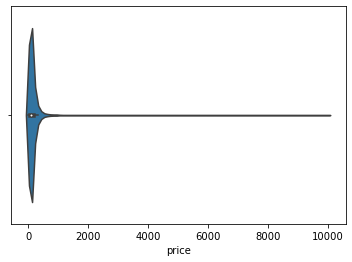

In [26]:
sns.violinplot(listings.price)

### Price: Outliers

After verifying data on the Airbnb website price above 7,000 USD are listings that are essentially innactive. The host sets a price to an unreasonable value to prevent guests from wanting to book. The host also is setting the availability to none. 

Listings outliers between 2,000 and 7,000 USD are justified. We confirmed those prices on the Aibnb website. These are luxury listings. 

### Approach
When building our models we will exclude observations 7k USD and above also. 0 USD from our model. 

### Accomadates: High and low outliers

C:\Users\Joey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accommodates'>

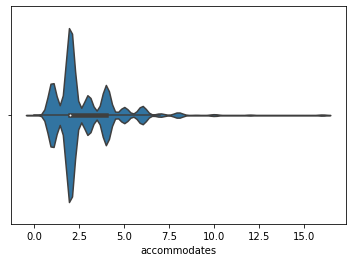

In [27]:
sns.violinplot(listings.accommodates.astype(float))


### High end of accommodates 
Some listings, to increase price, increase number beds in the listings to make listing more attractice. We confirmed this after checking the Airbnb website referencing a sample of these listings. 

Outliers are reasonable for a place with multiple beds, assuming two to a bed 

### Approach
These observations will remain in our data set and model.

### Minimum and maximum nights: outliers


C:\Users\Joey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights'>

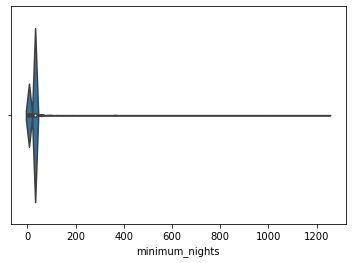

In [28]:
sns.violinplot(listings.minimum_nights.astype(float))

### Note the maximum value for maximum nights is a really long number -2147483647
Thus it doesn't display on the graph below. 

C:\Users\Joey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maximum_nights'>

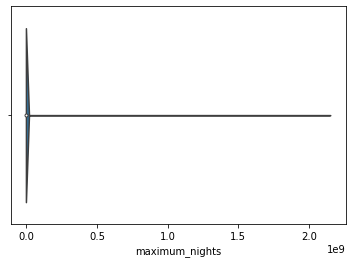

In [29]:
sns.violinplot(listings.maximum_nights.astype(float))

### Maximum Nights: For host seeking long term tenants, the max nights outliers are valid
An Explanations for right tailed statistics it appears people are looking for long term tennants on Airbnb. And is a reasonable value. Though they are probably using Airbnb outside of its intended scope. But Airbnb allows this activity. 

### Large Minimums: Hosts trying to make listing innactive or seek long term tenant
In some instances the listings must be booked for a year. For some hosts they are looking for long term tenants. Another reason for setting large minimum is to discourge bookings to create an innactive listing. 

### Small Minimum nights:
these are valid entries of minimum of 1 night. 

### Approach:
These observations appear to be using the airbnb application in accordance to the guidelines. We will note these as outliers and proceed with caution.

### Outliers: Listings count by host 



C:\Users\Joey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_listings_count'>

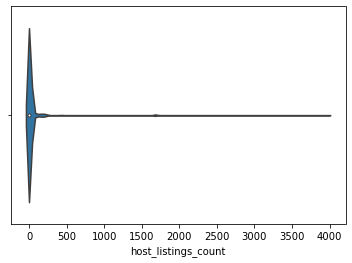

In [30]:
sns.violinplot(listings.host_listings_count.astype(float))

Some hosts have a large number of listings. It appears some people are using Airbnb as full time job managing listings. 

24502    https://www.airbnb.com/users/show/194953121

### Approach
These hosts listings count are confirmed. We will leave the observations in the data frame. 

# Section 4: Simple Statistics

### Examine simple statistics for all numerical values

To get a feel for our dataset, statistics summary was created for all numerical variables as shown in the table below. This is a gernalized view of the entire data set that contains numeric values. 

In [31]:
numerical =['float', 'float16', 'float64', 'Int16']
listings.describe(include = numerical)


,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,num_baths
count,36724.000000,36724.000000,36701.000000,36724.000000,36724.000000,36724.000000,36724.000000,36130.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36724.000000,36615.000000
mean,86.330958,75.619603,29.424975,40.729355,-73.949582,2.800920,1.294848,1.533518,160.109057,22.482083,7.035862,16.733145,28.271185,122.570608,22.854836,3.766638,0.472579,4.574993,4.751773,4.612116,4.820892,4.817110,4.754904,4.655163,13.432306,1.022812,1.161969
std,20.598808,23.295398,181.468593,0.055562,0.049611,1.869686,0.694162,1.133531,293.888431,28.361534,10.545903,21.867356,34.031130,138.765815,49.188479,13.591386,1.686377,0.745036,0.413984,0.487755,0.369454,0.386718,0.352899,0.433308,46.293004,3.374019,0.467587
min,0.000000,0.000000,0.000000,40.508630,-74.241350,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,86.330958,75.619603,1.000000,40.689530,-73.983170,2.000000,1.000000,1.000000,67.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.574993,4.751773,4.612116,4.820892,4.817110,4.754904,4.655163,1.000000,0.000000,1.000000
50%,86.330958,75.619603,1.000000,40.725530,-73.954990,2.000000,1.000000,1.000000,108.000000,30.000000,0.000000,2.000000,5.000000,57.000000,4.000000,0.000000,0.000000,4.670000,4.780000,4.612116,4.870000,4.880000,4.754904,4.655163,1.000000,0.170000,1.000000
75%,100.000000,93.000000,3.000000,40.762752,-73.931330,4.000000,1.000000,2.000000,175.000000,30.000000,12.000000,33.000000,61.000000,259.000000,19.000000,2.000000,0.000000,4.940000,5.000000,4.920000,5.000000,5.000000,5.000000,4.890000,3.000000,0.990000,1.000000
max,100.000000,100.000000,3966.000000,40.911390,-73.705220,16.000000,14.000000,42.000000,10000.000000,1250.000000,30.000000,60.000000,90.000000,365.000000,998.000000,669.000000,172.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,335.000000,192.930000,15.500000


## Price
Price is a target value. We created a histogram along with simple statistic summary for prices. The histogram shows a right skewed distribution.  The overall mean for cost per night to stay in at an Airbnb in NYC is about ~160 USD.  The prices range from 0 to 10,000 USD.  There are (38) hotel rooms listed with a minimum price of 0 USD, which could be a break from the active listings.


Half of the listed properties are cheaper than 108 USD (median) per night.  While there are (284) listings that cost more than 1,000 USD per night. 

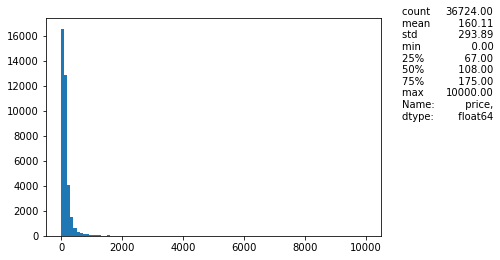

In [33]:
# Function to plot simple statistic summary on the side of histogram.
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

# Price - Histogram and Statistics Summary
pd.options.display.float_format = '{:.2f}'.format
plt.hist(listings['price'], bins=100)
plt.figtext(.95, .49, describe_helper(pd.Series(listings['price']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings['price']))[1], {'multialignment':'right'})
plt.show()

In [34]:
# Number and property type of listings with price $0
print("Number of listings with price $0 is", listings.price[listings.price==0].count(), "properties.")
print("Property type of listings with price $0 is", listings.room_type[listings.price==0].unique(), ".")

# Number of listings with price > $1,000
print("Number of listings with price more than $1,000 is", listings.price[listings.price>1000].count(), "properties.")

Number of listings with price $0 is 38 properties.
Property type of listings with price $0 is ['Hotel room']
Categories (1, object): ['Hotel room'] .
Number of listings with price more than $1,000 is 284 properties.


## Accommodates
More accommodations in a larger place could result in a higher price.  Our team believes accommodations are one of the major variables driving price.

The histogram of accommodations shows a right skewed distribution.  Accommodations range from 0 to 16.  Most of the properties, more than 16,000, are listed for 2 people.  The overall mean of accommodations is 2.80 with the median of 2.

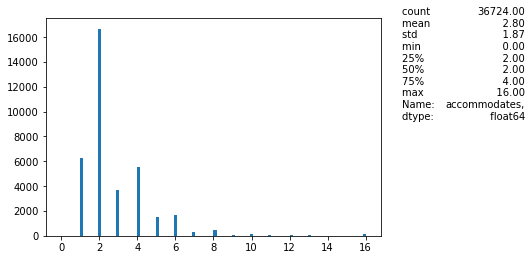

In [35]:
pd.options.display.float_format = '{:.2f}'.format
plt.hist(listings['accommodates'], bins=100)
plt.figtext(.95, .49, describe_helper(pd.Series(listings['accommodates']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings['accommodates']))[1], {'multialignment':'right'})
plt.show()

## Bedrooms
Outside of accommodations, bedrooms might also aid in price prediction.  The histogram of bedrooms shows a right skewed distribution.  The minimum amount of bedrooms is 1, while the maximum is 14.  The majority of the properties (29,244 properties) are listed with 1 bedroom which leads to minimum, lower quartile, median, and upper quartile all are equal to 1.  The overall mean of bedrooms is 1.29 with 0.69 standard deviation.

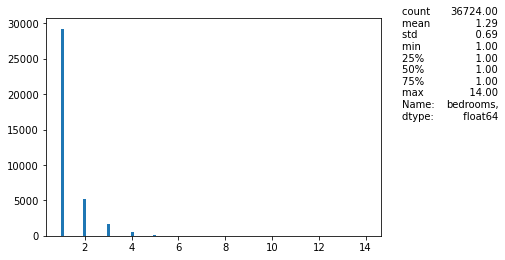

In [36]:
pd.options.display.float_format = '{:.2f}'.format
plt.hist(listings['bedrooms'], bins=100)
plt.figtext(.95, .49, describe_helper(pd.Series(listings['bedrooms']))[0], {'multialignment':'left'})
plt.figtext(1.05, .49, describe_helper(pd.Series(listings['bedrooms']))[1], {'multialignment':'right'})
plt.show()

In [37]:
# Number of listings with 1 bedroom
print("Number of listings with 1 bedroom is", listings.bedrooms[listings.bedrooms==1].count(), "properties.")

Number of listings with 1 bedroom is 29244 properties.


## Review ratings of listings
Another goal outside of price prediction is classifying 'superhost'.  As mentioned before, one criteria to become a superhost is a 4.8+ rating.  Review scores are certainly key variables in super host classification. They may aid in price prediction, as well.

Simple statistic summaries were conducted for all 7 review scores categories, listed below:
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value

All review categories are scaled from the minimum of 0 to the maximum of 5.  Most of listings have high review scores.  They all show left skewed distributions. Most of the data lean more towards a 4.5 - 5 rating. One clear trend is all review categories have the same number for their mean as well as their first quartile.  The means range from about 4.57 – 4.82 with 0.35 – 0.75 standard deviations.

In [38]:
# All type of review scores statistic summary

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format
print(listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].describe())

       review_scores_rating  review_scores_accuracy  \
count              36724.00                36724.00   
mean                   4.57                    4.75   
std                    0.75                    0.41   
min                    0.00                    0.00   
25%                    4.57                    4.75   
50%                    4.67                    4.78   
75%                    4.94                    5.00   
max                    5.00                    5.00   

       review_scores_cleanliness  review_scores_checkin  \
count                   36724.00               36724.00   
mean                        4.61                   4.82   
std                         0.49                   0.37   
min                         0.00                   0.00   
25%                         4.61                   4.82   
50%                         4.61                   4.87   
75%                         4.92                   5.00   
max                         5.00

### Examine summary table for all objective and category variables

Summary table for all objective and category variables was conducted. The table identifies data types of object and category. 



In [32]:
categorical = ['object', 'category']
listings.describe(include = categorical)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,first_review,last_review,bath_type
count,36711,36724,36724,36724,36605,36724,36724,36724,36724,36724,36724,36724,36724,36724,36724,36724,36724,36615
unique,35572,33319,18597,9013,1591,14551,5,450,530,209,223,5,75,4,30485,3082,2452,2
top,Water View King Bed Hotel Room,missing,missing,June,"New York, New York, United States",missing,missing,missing,"['email', 'phone']",missing,Bedford-Stuyvesant,Manhattan,Entire rental unit,Entire home/apt,"[""Long term stays allowed""]",2021-09-12,2021-09-12,private
freq,30,1236,14133,342,21287,15032,15676,6871,3395,14132,2690,16105,15445,19484,132,9415,9415,25260


# Section 5: Visualize Attributes

## Price, Neighborhood, and Room Type
As they say in real estate “Location, location, location.” and is applicable to Airbnb.  Location (or in this case, neighborhood) can be one of the major variables that drive the price.  Room type also plays a major role in price.

The strip plot below shows listing price in each neighborhood by room type. We can see that the majority of the listing are in Manhattan, Brooklyn, and Queens, respectively.  These same neighborhoods are also the only ones with listings of 10,000 USD.  Manhattan has the highest average listings across all different room types.  

The majority of room types are entire home/apartment and private rooms.  Outside of Manhattan, there aren't many hotel rooms listed.  Staten Island has no hotel rooms listed on Airbnb.  One interesting outlier to note; 
(3) shared room properties listed over 2,000 USD, 2 in Manhattan and another in Queens.  One of those in Manhattan is listed at 10,000 USD!  How can SHARED rooms be so expensive?

When a host lists a shared room as 10,000 USD the host is most likely setting price so high that no one will rent it. By doing so they take it off the market without having to delete listing data from the Airbnb website. 

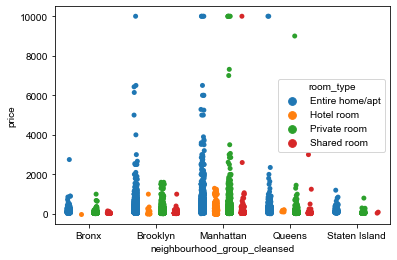

In [39]:
# Price, Neighborhood, and Room Type Strip Plot
sns.stripplot(x="neighbourhood_group_cleansed", y="price", hue="room_type", data=listings, dodge=True)
sns.set(rc = {'figure.figsize':(15,10)})

The bar chart below displays the number of each room type listed.  The plot indicates the majority of room types are entire homes/apartments (almost 20,000 listings) and private rooms (more than 16,000 listings).  The number of listings for shared and hotel rooms is comparatively less, supported by the strip plot above.  

Text(0, 0.5, 'Count')

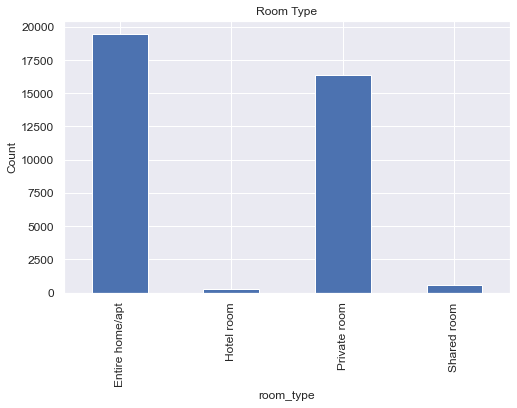

In [40]:
# Room Type Frequency Bar Chart
roomT = listings.room_type.groupby(listings.room_type).agg(['count'])

roomT.plot(kind='bar', title ="Room Type", figsize=(8, 5), legend=False, fontsize=12)
plt.ylabel('Count', fontsize=12)


## Host_is_superhost
Before classifying 'superhost', let’s look at the portion of hosts in NYC who became super hosts.

The pie chart below visualizes the percentage of superhosts compared to their baseline host counterparts. Only 18.1% of NYC hosts in NYC became superhosts.

array([<AxesSubplot:ylabel='host_is_superhost'>], dtype=object)

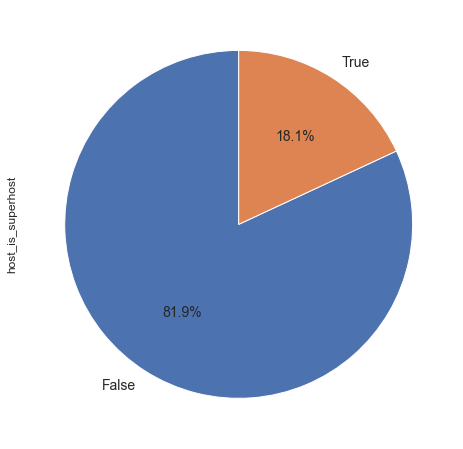

In [41]:
# host_is_super_host - Pie chart

superH = listings.host_is_superhost.groupby(listings.host_is_superhost).count()

superH.plot(kind='pie', subplots=True,startangle=90,
figsize=(8,8), autopct='%1.1f%%', textprops={'fontsize': 14})

## Review ratings of listings

As discussed, review scores are certainly key variables in super host classification and can also aid in price prediction.

The boxplot below displays all 7 review categories, listed below:

- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value

The chart highlights all review categories show left skewed distributions. Most of the data is between 4.5 to 5. They all show left skewed distributions. In general, rating, cleanliness, and value review scores tend to be a little bit lower than other 4 categories.

<AxesSubplot:xlabel='value', ylabel='variable'>

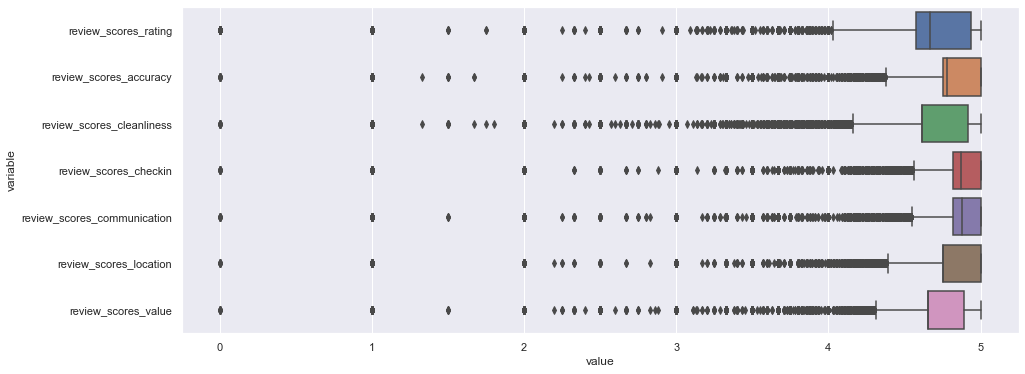

In [42]:
# All review score - Boxplot
review_scores = listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x="value", y="variable", data=pd.melt(review_scores))

# Latitude and Longitude
Latitude and longitude were used to help us visualize the listings' geographical distribution.

This heatmap below offers a visual representation of listing density by location. The hotter color (reds), the higher the density. Not surprisingly, Manhattan hast the highest density, followed by Brooklyn. Within the Manhattan area, the south of Central Park appears to have the most listings. This could be due to proximity to NYC tourist attractions, e.g. Time Square, Empire State Building, Grand Central Terminal, East Village, Wall Street, etc.

**Note**: the map is interactive. Feel free to scroll in for higher resolution. The map will automatically scale as you zoom in and out. Pretty neat!

 

In [43]:
import folium
from folium import plugins

m = folium.Map([40.7128,-74.0060], zoom_start=10)

# convert to (n, 2) nd-array format for heatmap
stationArr = listings[['latitude', 'longitude']].values

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=14))
m

# Section 6: Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

In [44]:
# Gather continous variables
listings_continous_columns = listings[[
    'host_response_rate',
    'host_listings_count', 
    'latitude', 'longitude',
    'accommodates',
    'bedrooms', 'beds', 
    'price','minimum_nights', 'maximum_nights', 
    'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location','review_scores_value', 'reviews_per_month',
    'calculated_host_listings_count'
]]



## Correlation Matrix: Continous Variables

<AxesSubplot:>

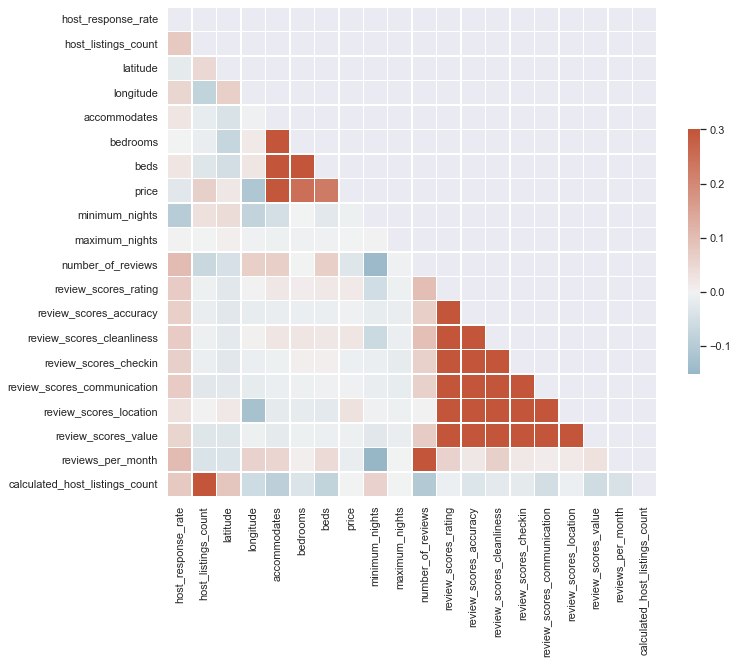

In [45]:
# Get correlation
corr = listings_continous_columns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Key observations:
**Review scores**:
- review_score_accuracy
- review_score_cleaniness
- review_score_checkin
- review_score_communication
- review_score_location
- review_score_value
Are all correlated with each other. 

We interpret this as a host who excels in one category also excels in another. And that a defeciet in one category leads to lower marks in all others. Guests are more likely to grade harshly if they find the host lacking in any one category. 

This is important for a host trying to achieve superhost status. 

**number_of_reviews** & **reviews_per_month**
This is intuitive. Properties with large number of reviews are likely to reviewed more times in a given month. 

**host_listings_count**, **calculated_host_listings_count** & **host_total_listings_count**
These categories display another intuitive correlation. The data set does not come with a definition of terms. And we are unable to derive the meaning between the small variation between the categories.


**accomodates**, **bedrooms** & **beds**
Intuitive the capactity that a listing can accommadte depends on the number of bedrooms and beds. 

Our interpretation is that this can be a host deliberate decision to increase the accomnmodation capacity of their listing. The size and number of bedrooms a listing has is relatively fixed. The host can decide to increase this by bringing in more beds for their guests. This may be done to make the listing more attractive and possibly garner a higher price. More analysis is needed to validate that hypothesis.

## Accomodates vs Beds - Scatter Plot


(0.0, 15.0)

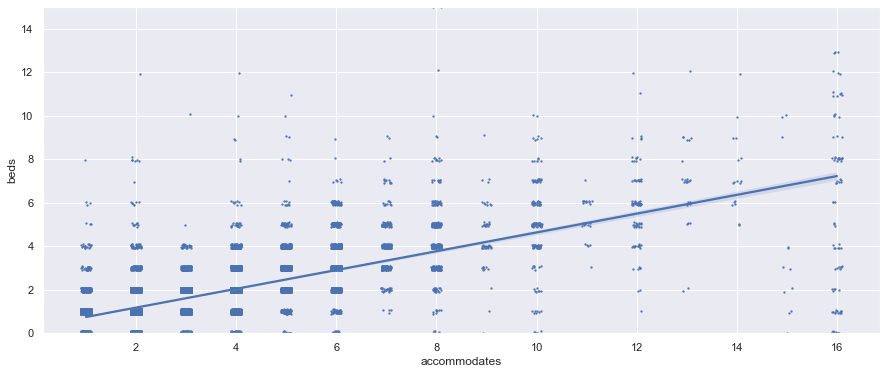

In [46]:
plt.figure()
sns.regplot(x=listings.accommodates.astype(float), y=listings.beds.astype(float), scatter_kws={'s':2},
           x_jitter=.1, y_jitter=.1)
plt.ylim(0, 15)

### Key Observations:

Gaining more granularity on the correlation matrix the scatter plot shows a linear relationship between beds and accommodates. 

### Host Response Time vs Reviews Per Month - Scatterplot

(0.0, 30.0)

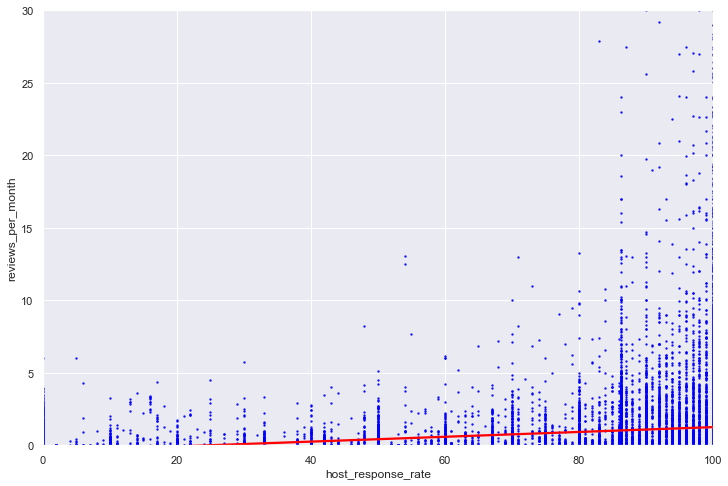

In [80]:
plt.figure(figsize=(12,8))
sns.regplot(x=listings.host_response_rate, y=listings.reviews_per_month, color= 'red' ,scatter_kws={'s':2, "color":"blue"})
plt.ylim(0, 30)


### Key Observations:

We felt these two categories would have a stronger relationship than observed above. Host_response_time we still believe drives 'superhosts' but it isn't strongly linearly relatied to reviews_per_month.

# Section 7: Explore Attributes and Class

For our target classifications and predictions, we explored correlations, trends and relationships against all attributes available. The key individual attributes driving each target are discussed below. In future work and we will explore interactions and multi-variate models

## Target: Superhost (classification)

## Host Response Time
While airbnb list certain criteria such as overall rating thresholds to become a superhost, the overall rating is influenced by many factors. The single strongest relationship to superhost status is how quickly hosts respond to guest inquiries. For hosts responding within a day, their likelihood of being a superhost is just below average. Hosts responding within an hour are twice as liekly to get superhost status

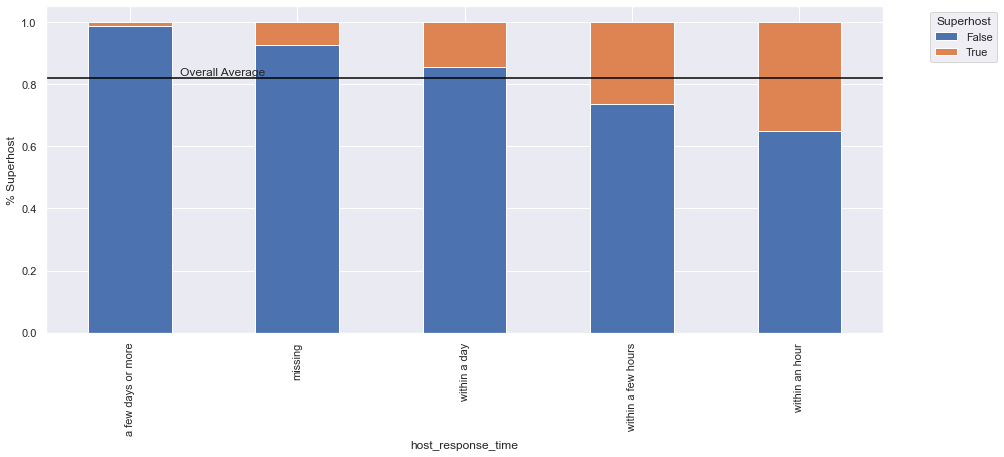

In [49]:
host_response_time = pd.DataFrame(pd.crosstab(listings.host_response_time, listings.host_is_superhost, normalize='index'))
host_response_time.plot.bar(stacked=True)
plt.ylabel('% Superhost')
plt.axhline(y=0.82, color='black')
plt.text(0.3,0.83,'Overall Average',rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="Superhost")
#plt.legend(loc='lower left')


## Number of reviews received

Guests are invited to review a listing after a stay. Hosts who are 'superhost' have more reviews. How do we explain this. A chicken or the egg question. Do guests write more reivews for supershosts or do superhosts get more guests and thus get reviewed more. 

This could indicate that more reviews give hosts a better chance at obtaining higher ratings, or it could be a causal effect. Obtaining superhost status theoretically increases bookings thus more opportunities for review. This also highlights an interesting area for further study in the future. 

The law of small numbers has an effect. The effect of single rating 4 or below has a greater impact pulling the average below 4.8, the minimum review rating needed to obtain status of 'superhost'.

(0.0, 150.0)

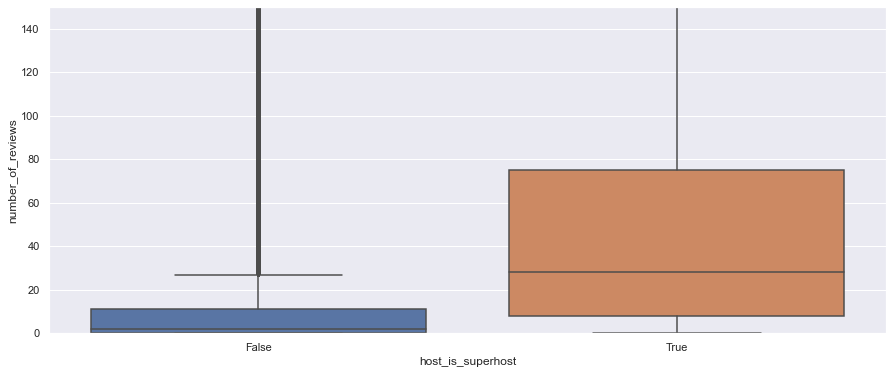

In [50]:
sns.boxplot(x="host_is_superhost", y="number_of_reviews", data=listings[listings.host_is_superhost.notna()], orient='v')
plt.ylim(0, 150)

## Review Rating

The overall review rating above 4.8 is one superhost criteria Airbnb states. Detailed review ratings are also provided. Within these subcategories, the cleanliness rating score shows the most substantial difference between hosts and superhosts.

The overall rating score also highlights another question for for further study. How are there superhosts with ratings less than 4.8?

Airbnb states a rating > 4.8 is required to become a superhost. However this plot shows a significant numer of superhosts with a rating less than 4.8. Further investigation is needed to understand how this happens. Is it possible that for hosts with many different properties/listings they only need to obtain superhost for one listing and then it applies to them overall for for every listing they have (even poorly rated listings)?

The data set is a snap shot in time. Airbnb does quarterly assessments on January 1st, April 1st, July 1st, and October 1st, every year. [Becoming a superhost](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost). There could be a lag between a host falling out of superhost criteria and Airbnb's superhost review. 


(4.0, 5.1)

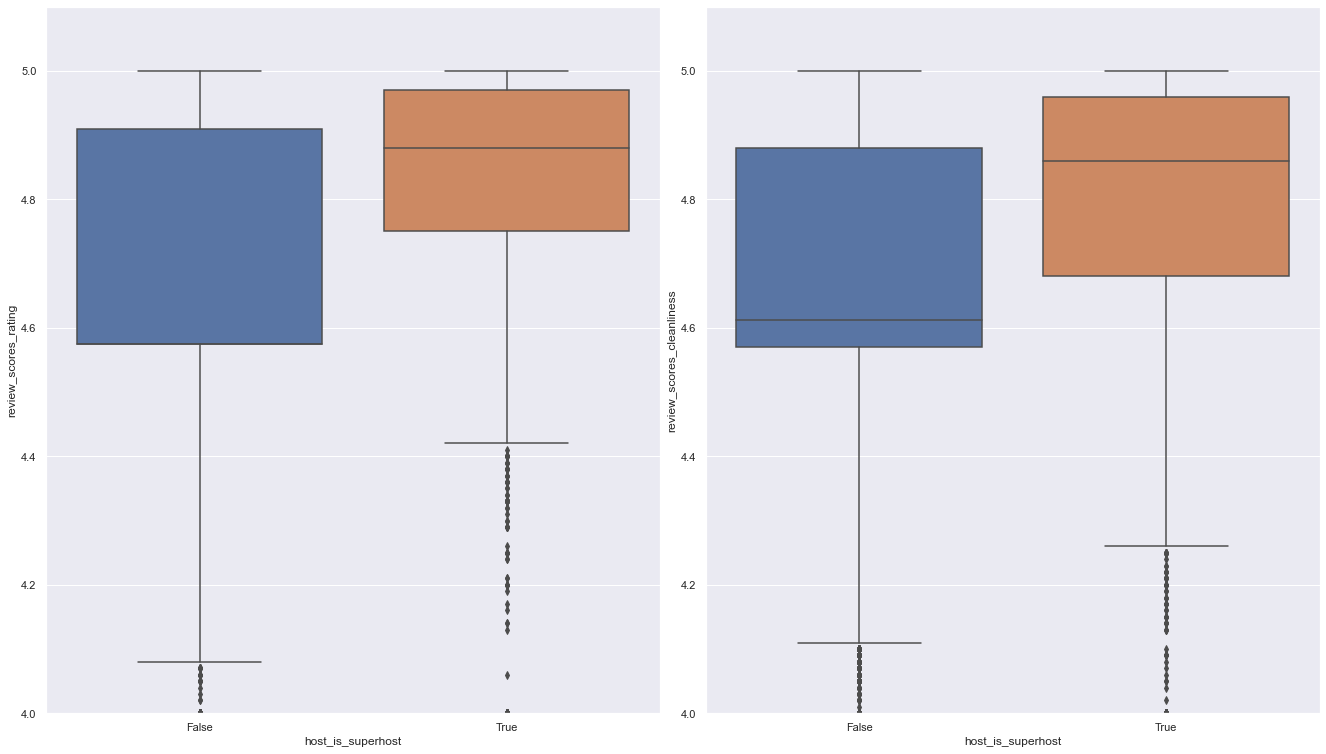

In [51]:
# sns.boxplot(x="host_is_superhost", y="review_scores_rating", data=listings[listings.host_is_superhost.notna() & listings.review_scores_rating.notna()])
# plt.ylim(4, 5.1)

# plt.figure()
# sns.boxplot(x="host_is_superhost", y="review_scores_cleanliness", data=listings[listings.host_is_superhost.notna()], orient='v')
# plt.ylim(4, 5.1)

plt.close('all')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()

ax = sns.boxplot(x="host_is_superhost", y="review_scores_rating", data=listings[listings.host_is_superhost.notna() & listings.review_scores_rating.notna()],
    ax=axes[0])
ax.set_ylim(4,5.1)
ax = sns.boxplot(x="host_is_superhost", y="review_scores_cleanliness", data=listings[listings.host_is_superhost.notna() & listings.review_scores_rating.notna()],
    ax=axes[1])
ax.set_ylim(4,5.1)


## Target: Price (regression)

## Accommodates

Many factors influence the price of an airbnb listing. The largest driver is how many guests the space can accomodate. The number of bedrooms and number of beds are jointly related to this variable. Total "Accomodates" shows the strongest relationship. This should be considered when doing other analysis such as comparing price by neighborhood etc. 

It could be helpful to create a new feature such as **price per accommodation** to normalize the cost to how many guests can be accomodated.

(0.0, 1500.0)

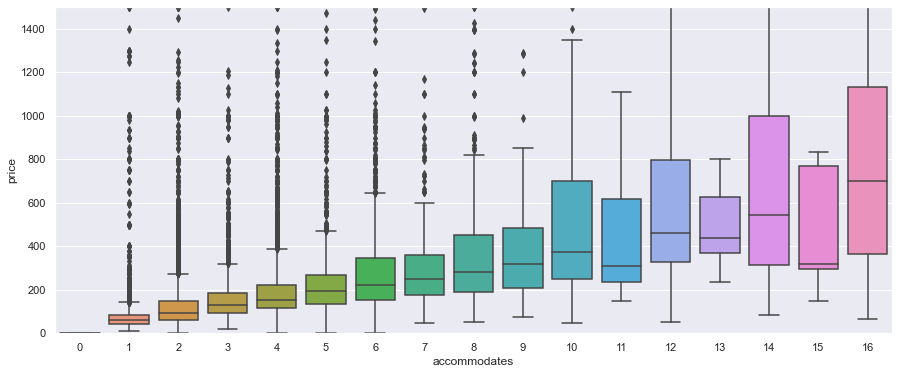

In [52]:
plt.figure()
sns.boxplot(x=listings.accommodates, y=listings.price)
plt.ylim(0, 1500)

## Neighbourhood Group

Another strong relationship to price is the neighborhood in which the listing is located. Manhattan commands the highest overall prices. This plot also highlights that there is a large range within each neighborhood group too. Exploring breakdowns within them could be helpful for future work. 

We could look at pricing clusters within these neighborhood groups or attempt to add additional data and features for proximity to transportation and popular attractions.

(0.0, 400.0)

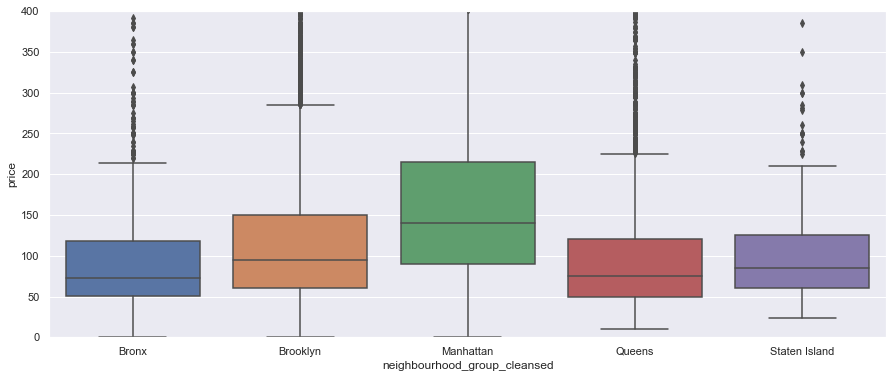

In [53]:
plt.figure()
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=listings[listings.neighbourhood_group_cleansed.notna()])
plt.ylim(0, 400)

## Room Type

The room type has a strong relationship to price as you would excpect. Renting an entire house costs more than just renting a room whether that room is private or shared. Interestingly, this plot also shows that Hotels listed on airbnb have higher prices than entire homes.

(0.0, 700.0)

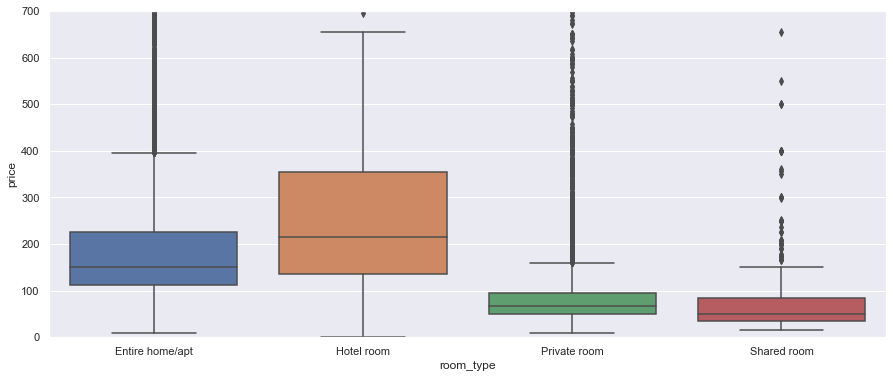

In [54]:
plt.figure()
sns.boxplot(x='room_type', y='price', data=listings[listings.room_type.notna()])
plt.ylim(0, 700)

## Bathroom Privacy

Properties that provide a shared bathroom rather than a private bathroom have much lower prices on Airbnb. For future work, studying the interaction of the number of private bathrooms vs. number of beds and the effect on price could be helpful

(0.0, 400.0)

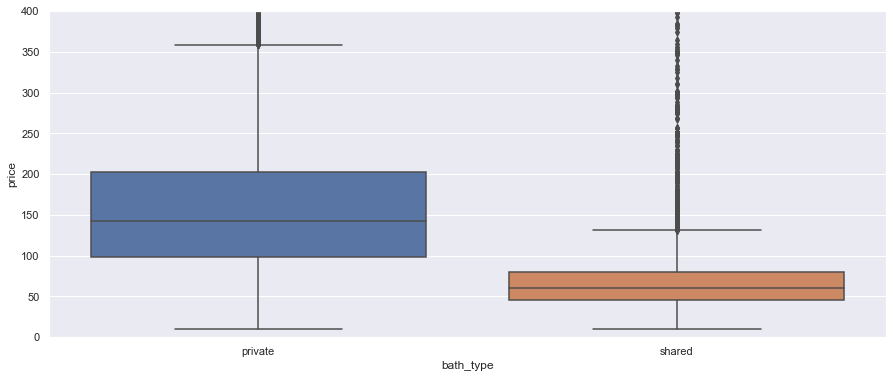

In [55]:
plt.figure()
sns.boxplot(x='bath_type', y='price', data=listings[listings.bath_type.notna()])
plt.ylim(0, 400)

# Section 8: New Features 

We generated ideas for new features that could be helpful in making our predictions.

We have separated the list into features we can create from this dataset or features that would require research into additional data sets
## New Features to create from this dataset:
* price_per_accomodation : since the listing price so strongly relates to the number of people the property can accomodate, this adjusted price variable could be helpful in making other comparisions
* price_per_bed : similarly guests may choose based on the number of beds available, as the hosts may determine the accomodations as 2 people per bed but guests may prefer 1 person per bed
* bathroom_text : separate into bathroom count and bathroom type (shared vs. private)
* [last_review - first_review] : compare to host_since, does this give additional insight?
* amenities : There are over 30k unique string values, can anything useful be parsed from here?
* property_type : There are 75 unique string values, can anything useful be parsed from here?
* host_verifications : separate list into different types for each unique and/or also add simple True/False verified
* description : Over 30k unique strings, could parse for keywords that show correlation and/or create a numeric description_length 
* host_about : Over 14k unique strings, could parse for keywords that show correlation and/or create a numeric description_length
* interactions : for example combinations of #bedrooms * #bathrooms


 ## New Features that would require additional outside data sources:
 * Proximity to attractions:  such as Yankee stadium and subway stations. We may be able to find publicly available data for these with lattitude and longitude so they could be merged with our listing coordinates and distances calculated.
 * Days booked in the past year: While our current dataset includes availability for listings looking forward, the lack of availability does not necessarily mean that's how much it is booked up. Hosts can limit their availability to weekdays, weekends etc. It would be nice to have the number of days a listing has been booked overall or in the past year. As far as we know this data is private and may not be available to us
 * Occupancy rate: (booked/available) could be a good predictor for both superhost and price, similarly data is private
 * Guest Cancellations: Could be a good predictor of issues with hosting such as communication or others, similarly data is private
 * Host Cancellations: Important because this is one of the Airbnb criteria for superhosts but this data is private
 * Average Length of guest stay: could be a good predictor for both superhost and price, similarly data is private

# Section 9: Exceptional Work

We spent a lot more time wrangling and cleaning the data into proper types than expected. These efforts included:
* Writing a custom function to transform variables containing "t", "f", blank into a boolean type with proper True/False while still preserving "NA" rather than using "bool" by dropping missing values or just using a string format or one-hot encoding
* Although the neighbourhood variable showed 0 NA in the isna() summary tables we noticed through viewing the data that many were missing. After iterating through 10 tests against the strange na type upon import, we wrote a custom function to replace them with proper np.nan so that it would show up in the missing value reports and could be imputed
* Where appropriate and possible set as many variables as integers instead of floats to set ourselves up for smaller data storage and faster modeling time on future work. Our initial efforts using "int" failed unless we dropped NA values. Rather than take the easiest path of deleting or just making into floats, we researched and found that type "Int64" would support NA's

After preparing the data and completing the basic framework of exploratory analysis, we focused our additional efforts on creating some of the new features so we have them available for future work:
* Bathrooms: with a custom dictionary and function we separated the bathroom_text into two separate attributes a numeric for the bathroom count and a string for the type (private vs shared)
* Reviews Duration: a new feature that may better represent how long a host has actively been renting properties vs. just the host_since variable. See below for code and summary
* Price per bed: Since price has such a strong dependence on the number of beds available at the house, create an adjusted price to account for this and use in further analysis
* Price per accomodation: Since price has such a strong dependence on the number of guests the house can accomodate, create an adjusted price to account for this and use in further analysis

## New Feature: Reviews Duration

Create this from the time difference of last review minus first review. This may be a more accurate representation of how long someone has been an active host than the original host_since variable provided in the dataset which appears to be based on sign up date, not activity.

The plot below also shows some negative values which need further investigation to understand why

(-400.0, 4000.0)

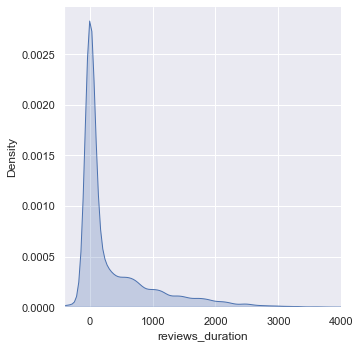

In [56]:
listings['reviews_duration'] = listings.last_review - listings.first_review
# Format is timedelta, extract the numer of days like this:
listings.reviews_duration = listings.reviews_duration.astype('timedelta64[D]')

sns.displot(listings.reviews_duration, fill=True, kind="kde")
plt.xlim(-400, 4000)


## New Feature: Price per bed

275.0
2
137.5


(0.0, 250.0)

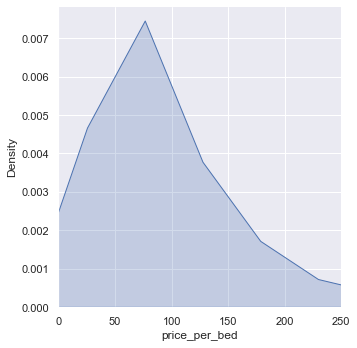

In [57]:
listings['price_per_bed'] = listings.price / listings.beds
listings.price_per_bed.replace([np.inf, -np.inf], np.nan, inplace=True)
print(listings.price.iloc[3])
print(listings.beds.iloc[3])
print(listings.price_per_bed.iloc[3])

sns.displot(x=listings.price_per_bed[listings.price_per_bed.notna()], fill=True, kind="kde")
plt.xlim(0, 250)


## New Feature: Price per accomodation

In [58]:
listings['price_per_accomodation'] = listings.price / listings.accommodates
listings.price_per_accomodation.replace([np.inf, -np.inf], np.nan, inplace=True)
print(listings.price.iloc[3])
print(listings.accommodates.iloc[3])
print(listings.price_per_accomodation.iloc[3])

#Issue filtering NA
#sns.displot(x=listings.price_per_accomodation[listings.price_per_accomodation.notna()], fill=True, kind="kde")
#plt.xlim(0, 250)

275.0
4
68.75


## New Features: room_privacy & domicile_type

**property_type** has two bits of information nested in it. It lets the guest know the privacy status of a listings and domicile type e.g., house, condo, villa, hotel etc. To atomize this information we will use the same strategy as bathroom text to parce out the information. 

In [81]:
#quick check of missing values reveals none
sum(listings['property_type'].isnull())

KeyError: 'property_type'

### No nulls found
If there would have been null values we would need to create a place holder in the data dictionary. Because there are none. We wont have to perform a missing value place holder. 

In [59]:
#75 unique combinations of privacy level and domicile type
mylist = list(listings['property_type'].unique())
print(len(mylist))
print(mylist)

75
['Entire rental unit', 'Entire guest suite', 'Private room in rental unit', 'Private room in townhouse', 'Private room in condominium (condo)', 'Private room in loft', 'Entire loft', 'Private room in residential home', 'Entire condominium (condo)', 'Entire residential home', 'Entire townhouse', 'Private room in bed and breakfast', 'Entire guesthouse', 'Private room in guest suite', 'Bus', 'Room in boutique hotel', 'Shared room in loft', 'Shared room in rental unit', 'Shared room in residential home', 'Private room', 'Private room in hostel', 'Entire place', 'Private room in guesthouse', 'Boat', 'Entire serviced apartment', 'Room in aparthotel', 'Shared room in earth house', 'Floor', 'Shared room in hostel', 'Room in serviced apartment', 'Entire cottage', 'Shared room in condominium (condo)', 'Private room in serviced apartment', 'Room in hotel', 'Private room in boat', 'Cave', 'Tiny house', 'Private room in floor', 'Entire bungalow', 'Shared room in townhouse', 'Houseboat', 'Private

In [60]:
#create dictionary of terms
prop_type_transdict = {'Entire rental unit' : 'entire rental-unit',
'Entire guest suite' : 'entire guest-suite', 
'Private room in rental unit' : 'private-room rental-unit',
'Private room in townhouse' : 'private-room townhouse',
'Private room in condominium (condo)': 'private-room condo', 
'Private room in loft': 'private-room loft', 
'Entire loft': 'entire loft',
'Private room in residential home': 'private-room home',
'Entire condominium (condo)': 'entire condo',
'Entire residential home': 'entire home',
'Entire townhouse': 'entire townhouse',
'Private room in bed and breakfast': 'private-room bnb',
'Entire guesthouse': 'entire guesthouse', 
'Private room in guest suite': 'private-room guest-suite',
'Bus': 'entire Bus',
'Room in boutique hotel': 'private-room boutique-hotel',
'Shared room in loft': 'shared-room loft',
'Shared room in rental unit':'shared-room rental-unit', 
'Shared room in residential home': 'shared-room home', 
'Private room': 'private-room room', 
'Private room in hostel':'private-room hostel',
'Entire place': 'entire place',
'Private room in guesthouse': 'private-room guesthouse',
'Boat': 'entire boat',
'Entire serviced apartment': 'entire serviced-apartment',
'Room in aparthotel': 'private-room aparthotel',
'Shared room in earth house': 'shared-room earth-house',
'Floor': 'entire floor',
'Shared room in hostel': 'shared-room hostel', 
'Room in serviced apartment': 'private-room serviced-apartment',
'Entire cottage': 'entire cottage',
'Shared room in condominium (condo)': 'shared-room condo',
'Private room in serviced apartment': 'private-room serviced-apartment',
'Room in hotel': 'private-room hotel',
'Private room in boat': 'private-room boat',
'Cave': 'entire cave', 
'Tiny house': 'entire tiny-house',
'Private room in floor': 'private-room floor',
'Entire bungalow': 'entire bungalow',
'Shared room in townhouse': 'shared-room townhouse',
'Houseboat': 'entire houseboat',
'Private room in bungalow': 'private-room bungalow',
'Entire villa': 'entire villa',
'Private room in resort': 'private-room resort',
'Shared room in guest suite': 'shared-room guest-suite',
'Private room in castle': 'private-room castle',
'Private room in villa': 'private-room villa',
'Shared room in floor':'shared-room floor',
'Shared room in serviced apartment':'shared-room serviced-apartment',
'Entire bed and breakfast': 'entire BnB',
'Entire home/apt': 'entire home',
'Private room in tiny house':'private-room tiny-house', 
'Private room in tent':'private-room tent',
'Private room in in-law': 'private-room in-law',
'Private room in barn': 'private-room barn',
'Camper/RV': 'entire rv',
'Room in resort':'private-room resort',
'Shared room in bed and breakfast': 'shared-room bnb',
'Private room in farm stay': 'private-room farm',
'Private room in casa particular': 'private-room home',
'Private room in dorm': 'private-room dorm',
'Room in bed and breakfast':'private-room bnb',
'Private room in camper/rv': 'private-room rv',
'Shared room in island': 'shared-room island',
'Shared room in bungalow': 'shared-room bungalow',
'Private room in earth house': 'private-room earth-house',
'Private room in cottage': 'private-room cottage',
'Lighthouse': 'entire lighthouse', 
'Private room in train': 'private-room train',
'Barn': 'entire barn',
'Private room in lighthouse': 'private-room lighthouse',
'Castle': 'entire castle',
'Tent': 'entire tent',
'Tower': 'entire tower',
'Casa particular': 'entire home'}

#use prop_type_trandict to iterate over bathrooms_text column
listings['property_type'] = [prop_type_transdict[letter] for letter in listings['property_type']]

#use str.split to create two new columns 'room_privacy' and 'domicile_type'
listings[['room_privacy','domicile_type']] = listings['property_type'].str.split(expand=True)

#convert new columns to category data type
listings['room_privacy'] = listings['room_privacy'].astype('category')
listings['domicile_type'] = listings['domicile_type'].astype('category')

In [61]:
print(list(listings['room_privacy'].unique()))
print(len(list(listings['domicile_type'].unique())))

['entire', 'private-room', 'shared-room']
38


### Results of property_type atomization

(3) levels of privacy extracted. 
1. Entire
    denoting guests will have the domicile to themselves.
2. private-room 
    guests will have a room to themselves but shared access to common areas with other guests or hosts
3. shared-room
    guests will possibly share a room with other guests or hosts and shared access to common areas. <br><br />

(38) different categories of domicile 
- casa particular I reduced to home (spanish for private residence)
- private room in law i left as room in law. Refers to in law suite. This is your own space on a property but is on the same property as another domicile.
- bed and breakfast is bnb
- Floor i left as floor. I could grasp the meaning of that either
- Villa remains villa since I think that describes a particular domicile that differs from home
- rental unit could be merged into apartment but it could also mean a home so i left as is. 
- serviced-apartment is probably something unique and deserves its own class outside of apartment
- townhouse remains townhouse since I think that describes a particualr domicile that differs from home. 
- aparthotel remains due to lack of understanding 

### Bar graphs of the count of room_privacy & domicile_type




<AxesSubplot:xlabel='count', ylabel='room_privacy'>

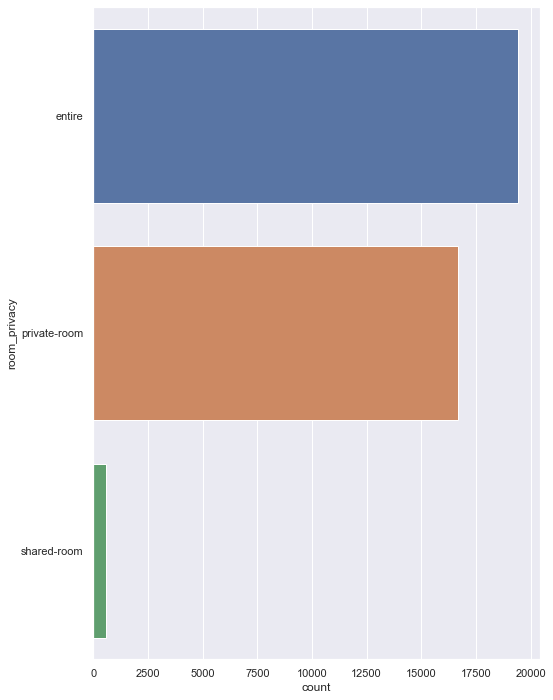

In [62]:
plt.figure(figsize=(8,12))
sns.countplot(y="room_privacy", data=listings, order = listings['room_privacy'].value_counts().index, orient='h')


### Key Observations:

Most listings fall in the entire or private room. Demand is probably higher for these types of accomdations in NYC.

<AxesSubplot:xlabel='count', ylabel='domicile_type'>

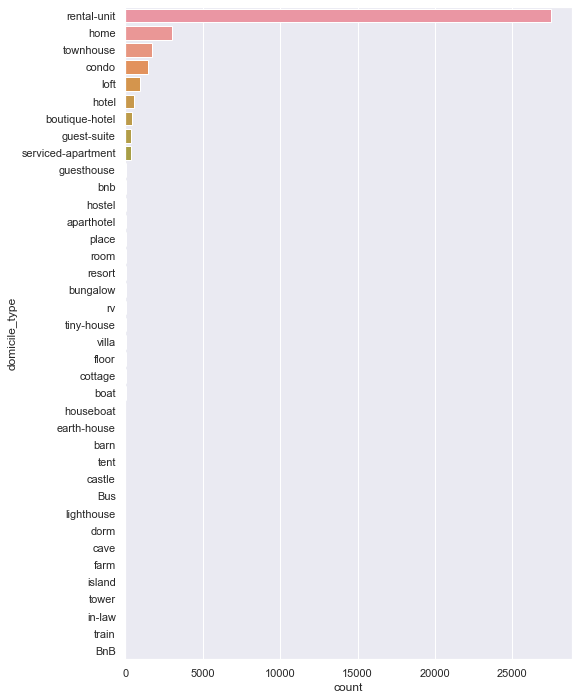

In [63]:
plt.figure(figsize = (8,12))
sns.countplot(y="domicile_type", data=listings, order = listings['domicile_type'].value_counts().index, orient='h')


### Key Observations:

Top Five domiciles types:
- Rental-Unit
- Home
- Townhouse
- Condo
- Loft

It appears many people are listing units that they might not own but, have certain rights to list on Airbnb. This makes sense for NYC many people rent apartments, instead of owning homes. To make money on the side they might stay with family or friends and list the unit.

### Approach:
We will observe how our Machine learning algorithm deals with that many types of domicile. We may reduce the levels with further groupings of categories with low sample sizes. 

### Drop property_type
removing this column from the data frame. 

In [64]:
listings.drop(['property_type'], axis=1, inplace = True)

## Manhattan Listings Heatmap with Attractions
According to heatmap plot in 'Visualize Attributes', south of Central Park, specifically Hell's Kitchen, has the highest listing density. The visualization below overlays popular attractions in the area of interest.

The icons plotted on the map are the following (from north to south):
* Central Park: Green leaf icon
* Time Square: Black star icon
* Penn Station: Purple trail icon
* Empire State Building: Blue tower icon
* East Village: Gray user icon
* Wall Street: Red file icon

We can see that the areas that have highest listing density are in Hell's Kitchen, Midtown South, East Village, Lower Manhattan, and Financial District. The closer to the attractions tends to have the more density of listings.

In [82]:
# Manhattan Heat Map with Attaction Icons

m = folium.Map([40.7400, -73.96000], zoom_start=11)

# convert to (n, 2) nd-array format for heatmap
stationArr = listings[['latitude', 'longitude']].values

# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))

# Add attraction icons
folium.Marker(location=[40.7812, -73.9665], popup='Central Park',icon=folium.Icon(color='green', icon='leaf')).add_to(m)
folium.Marker(location=[40.7580, -73.9855], popup='Time Square',icon=folium.Icon(color='black', icon='star')).add_to(m)
folium.Marker(location=[40.7484, -73.9857], popup='Empire State Building',icon=folium.Icon(color='blue', icon='tower')).add_to(m)
folium.Marker(location=[40.7506, -73.9935], popup='Penn Station',icon=folium.Icon(color='purple', icon='road')).add_to(m)
folium.Marker(location=[40.7265, -73.9815], popup='East Village',icon=folium.Icon(color='gray', icon='user')).add_to(m)
folium.Marker(location=[40.7060, -74.0088], popup='Wall Street',icon=folium.Icon(color='red', icon='file')).add_to(m)

m

### Export new CSV file to Lab2 on Github

In [66]:
# listings.to_csv("C:/Users/Joey/OneDrive/Documents/SMU/3 term/7331 ML1/Labs/Lab 1 visualization and data prep/airbnb/Lab2/listings.csv")
